# Crime Data Analysis

- Your analysis here
  
---

In [3]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
data_2010_2019 = Path("/Users/sumanmurali/Downloads/Starter_Code-8/Project 1/Crime_Data_from_2010_to_2019 (1).txt")
data_2020_2023 = Path("/Users/sumanmurali/Downloads/Starter_Code-8/Project 1/Crime_Data_from_2020_to_Present_20231016.txt")

# Read data(2010-2019) and data (2020- present)Data File and store into Pandas DataFrames
pre_covid_data = pd.read_csv(data_2010_2019)
post_covid_data = pd.read_csv(data_2020_2023)
#pre_covid_data.head(5)
#post_covid_data.head(5)

# Combine the data into a single dataset.  
Data_complete = pd.concat([pre_covid_data, post_covid_data], ignore_index=True)
Data_complete.columns


Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON', 'AREA'],
      dtype='object')

In [2]:
Data_complete.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13.0,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695,NaN
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14.0,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962,NaN
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13.0,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524,NaN
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6.0,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295,NaN
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1.0,Central,176,1,122,"RAPE, ATTEMPTED",...,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488,NaN


In [3]:
Data_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951497 entries, 0 to 2951496
Data columns (total 29 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            float64
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
 28  AREA        

Data Analysis


In [4]:
len(Data_complete.columns)

29

In [5]:

Data_complete['Crime Year'] = pd.to_datetime(Data_complete['Date Rptd']).dt.year

Data_complete['Crime Year']

0          2010
1          2010
2          2010
3          2010
4          2010
           ... 
2951492    2023
2951493    2023
2951494    2023
2951495    2023
2951496    2023
Name: Crime Year, Length: 2951497, dtype: int64

In [6]:
#Drop the columns not needed
Data_complete.drop(Data_complete.columns[[1, 2, 3, 4, 6, 7, 10, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25,28]], axis=1, inplace=True)

# Now, you can access Data_complete without any issues



In [7]:

# Clean data for duplicate
Data_complete = Data_complete.drop_duplicates(subset=['DR_NO'])
# Clean data for -ve values

# Remove enteries with  Victim Sex : X and Victim Race: X, Removing 0 in VictAge

Data_complete = Data_complete[Data_complete['Vict Age'] > 0]

In [8]:
Data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332485 entries, 0 to 2951496
Data columns (total 11 columns):
 #   Column        Dtype  
---  ------        -----  
 0   DR_NO         int64  
 1   AREA NAME     object 
 2   Crm Cd        int64  
 3   Crm Cd Desc   object 
 4   Vict Age      int64  
 5   Vict Sex      object 
 6   Vict Descent  object 
 7   Premis Desc   object 
 8   LAT           float64
 9   LON           float64
 10  Crime Year    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 213.5+ MB


In [9]:
# Change the name of the columns
Data_complete.rename(columns={
                    'DR_NO':'DR Number',
                    'Crime Year': 'Crime Year',
                    'AREA NAME': 'Area Name',
                    'Crm Cd': 'Crime Code',
                    'Crm Cd Desc':'Type of Crime',
                    'Vict Age': 'Victim Age',
                    'Vict Sex': 'Victim Gender',
                    'Vict Descent': 'Victim Ethnicity',
                    'Premis Desc': 'Scene of Crime',
                    'LAT': 'Latitude',
                    'LON': 'Longitude'
                    
},inplace= True)

Data_complete.head()





,DR Number,Area Name,Crime Code,Type of Crime,Victim Age,Victim Gender,Victim Ethnicity,Scene of Crime,Latitude,Longitude,Crime Year
0,1307355,Newton,900,VIOLATION OF COURT ORDER,48,M,H,SINGLE FAMILY DWELLING,33.9825,-118.2695,2010
3,90631215,Hollywood,900,VIOLATION OF COURT ORDER,47,F,W,STREET,34.1016,-118.3295,2010
4,100100501,Central,122,"RAPE, ATTEMPTED",47,F,H,ALLEY,34.0387,-118.2488,2010
5,100100506,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,B,DEPARTMENT STORE,34.0480,-118.2577,2010
6,100100508,Central,330,BURGLARY FROM VEHICLE,46,M,H,STREET,34.0389,-118.2643,2010


In [10]:
Data_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332485 entries, 0 to 2951496
Data columns (total 11 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DR Number         int64  
 1   Area Name         object 
 2   Crime Code        int64  
 3   Type of Crime     object 
 4   Victim Age        int64  
 5   Victim Gender     object 
 6   Victim Ethnicity  object 
 7   Scene of Crime    object 
 8   Latitude          float64
 9   Longitude         float64
 10  Crime Year        int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 213.5+ MB


In [11]:
unique_demo = Data_complete["Victim Age"].value_counts()
print(unique_demo)

25     63307
28     63285
27     63116
30     63075
29     62990
       ...  
96       273
97       228
98       177
118        1
120        1
Name: Victim Age, Length: 100, dtype: int64


In [12]:
unique_demo = Data_complete["Victim Ethnicity"].value_counts()
print(unique_demo)

H    938014
W    615768
B    440622
O    215936
A     66599
X     27139
K     12271
F      5875
C      4157
I      1673
J      1538
V      1040
P       554
Z       546
U       275
G       138
D        82
S        70
L        67
-         3
Name: Victim Ethnicity, dtype: int64


In [13]:
unique_demo = Data_complete["Area Name"].value_counts()
print(unique_demo)

77th Street    163033
Southwest      158221
Central        130086
Pacific        123949
Southeast      121684
N Hollywood    121637
Hollywood      113135
Van Nuys       110939
Topanga        109039
West LA        105087
Wilshire       105011
Newton         104731
Rampart        104128
Northeast      103791
Devonshire     102243
Mission        101023
Olympic         98995
West Valley     98016
Harbor          94000
Foothill        85644
Hollenbeck      78093
Name: Area Name, dtype: int64


## Crimes Summary

In [14]:
Total_crime_count = len(Data_complete['DR Number'])
Total_crime_count

2332485

In [15]:
# Calculate the total number of Crimes 
##Total_crime_count = Data_complete.len['Type of Crime']


# unique kind of the crimes:
#Kind_of_crimes = clean_crime_data.groupby(["Crm Cd Desc","crime_year"], as_index = false).count()

# Pick which highest frequency (5)
#highest_frequency_crime = Kind_of_crimes.sort_values(ascending= False)

# Inside the home and outside the home( COVID people were home)



In [16]:
#Plot a line graph showing the overall crimes trend change over the years
plot.line

NameError: name 'plot' is not defined

In [ ]:
# Calculate the kind of crimes (e.g different kind of crimes) per year??
#the distribution of crime types over the years
#clean_crime_data.loc(2017)
#df_2017= 
#df_2018
#df_2019
#df_2020
#df_2021
#df_2022
#crime_type



In [ ]:
# Create a dataframe with crime_type and year????
crime_summary = pd.DataFrame({
    

In [ ]:
# Plot a bar plot with multiple columns over the different years for total number of crimes(value count)


In [ ]:
# Plot another histogram for average of pre covid and post covid crimes (Total and one for each crime).

## Area Summary

In [ ]:
#  select all of the different Areas


In [ ]:
# Divide areas into Central, Valley, South, West

In [ ]:
# Calculate the total crimes per area per year
per_area_crime_counts = 

In [ ]:
#calculate crime types per area
# Five highest crimes 

In [ ]:
# Geoplot the area 

In [ ]:
# Make a data frame with Columns for Average crime per area


# Display Data Frame

In [ ]:
# Highest Crime Area(By Total Crimes)

In [ ]:
# Lowest Crime Area (By Total Crime)

In [ ]:
#Bar chart four areas, four years and total number of crimes

In [ ]:
# Identify Hot Spots
#Crime in each area acroos the years

In [ ]:
# Any change in the Hot spots overs the years


### Female Vs Male Victims

In [ ]:
# Generate a pie plot showing the distribution of female versus male victims using Pandas
data = data["Sex"].value_counts()
plt.title("Female vs. Male Victims")
Female_male_data.plot.pie(autopct= "%1.1f%%")
plt.show()

### Victim Race 

/var/folders/mg/7368n4nd1s3f17ky8wpbjqtm0000gn/T/ipykernel_40278/4290456623.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hispanic_data['DATE OCC'] = pd.to_datetime(hispanic_data['DATE OCC'])
/var/folders/mg/7368n4nd1s3f17ky8wpbjqtm0000gn/T/ipykernel_40278/4290456623.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hispanic_data['Crime Year'] = hispanic_data['DATE OCC'].dt.year


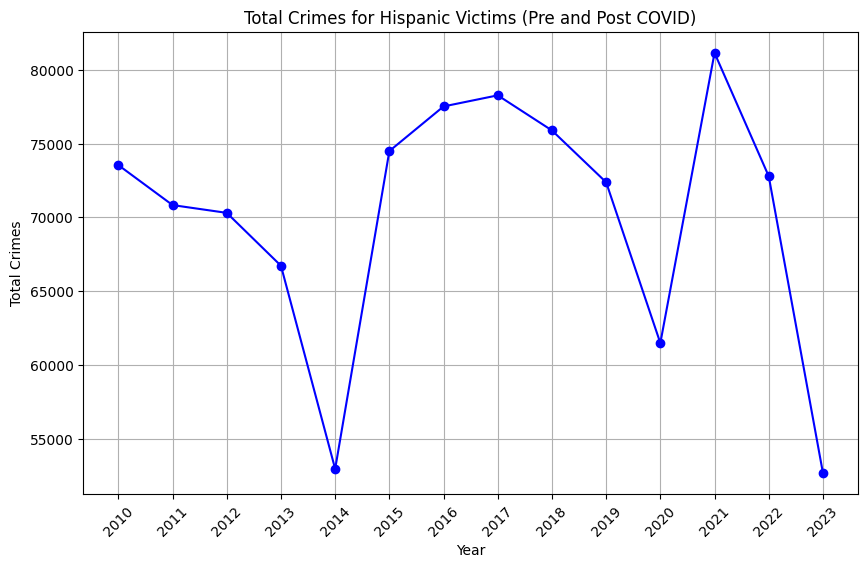

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your pre and post-COVID data
pre_covid_data = pd.read_csv(data_2010_2019)
post_covid_data = pd.read_csv(data_2020_2023)

# Concatenate the data into one DataFrame 
Data_complete = pd.concat([pre_covid_data, post_covid_data], ignore_index=True)

# Filter the data for Hispanic race# Filter the data for Hispanic ethnicity ('H') in the 'Vict Descent' column
hispanic_data = Data_complete[Data_complete['Vict Descent'] == 'H']
# Ensure 'DATE OCC' is in datetime format
hispanic_data['DATE OCC'] = pd.to_datetime(hispanic_data['DATE OCC'])

# Extract the year from 'DATE OCC' and store it in a new column 'Crime Year'
hispanic_data['Crime Year'] = hispanic_data['DATE OCC'].dt.year

# Group the data by 'Crime Year' and count the number of crimes
crime_counts = hispanic_data.groupby('Crime Year').size()

# Group the data by year and count the number of crimes
crime_counts = hispanic_data.groupby('Crime Year').size()

# Plot a line graph to visualize the total crimes over the years
plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts.values, marker='o', linestyle='-', color='b')
plt.title('Total Crimes for Hispanic Victims (Pre and Post COVID)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True)
plt.xticks(crime_counts.index, rotation=45)
# Show the plot
plt.show()




# Child Abuse compare over the years

## Change in crime spot

In [ ]:
#Splitting race by groups: Black, White, Hispanics, Asians

In [ ]:
#Splitting premise into 4 categories: Commercial, residential, industrial and outdoors
# using Bins

In [ ]:
#Percentage of increase and decrease in crimes over the years
Total_crime_count groupbyyear (count)

In [ ]:
 #How has crime changed over the years?
 
 Line graphs 